<a href="https://colab.research.google.com/github/Kp-bishi/New/blob/main/Disease_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  # Import OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import io
import requests

# STEP 1: Load data
# Download the file from Google Drive using requests
# Updated URL to download the file directly:
url = "https://drive.google.com/uc?export=download&id=13OBvQ103CnCSoDGiGG9hKTzEKCs_x-2Y"
response = requests.get(url)
response.raise_for_status()  # Raise an exception for bad responses

# Read the CSV data from the response content
df = pd.read_csv(io.StringIO(response.content.decode('utf-8'))) # Decode the content

# Assuming 'Disease' is the target column (replace if different)
target_column = 'Disease'

# Check if the target column exists before proceeding
if target_column not in df.columns:
    raise KeyError(f"The '{target_column}' column is not found in the DataFrame. Please check your data source or file.")

# STEP 2: Encode target labels
label_encoder = LabelEncoder()
# Fit the LabelEncoder on all unique target values
label_encoder.fit(df[target_column])
df['target_encoded'] = label_encoder.transform(df[target_column])

# STEP 3: Feature and label separation + One-Hot Encoding for categorical features
# Assuming all columns except the target and encoded target are features
X = df.drop(columns=[target_column, 'target_encoded'])
y = df['target_encoded']

# Identify categorical features (e.g., columns with object dtype)
categorical_features = X.select_dtypes(include=['object']).columns

# One-Hot Encode categorical features
if len(categorical_features) > 0:  # Check if there are categorical features
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Create OneHotEncoder
    encoded_features = encoder.fit_transform(X[categorical_features])
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
    X = X.drop(columns=categorical_features)  # Drop original categorical columns
    X = pd.concat([X, encoded_df], axis=1)  # Concatenate encoded features


# STEP 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 5: Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# STEP 6: Evaluate model
y_pred = clf.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
# Get unique classes from y_test and y_pred for the report
unique_classes = set(y_test) | set(y_pred)
report_labels = sorted(list(unique_classes)) # Ensure consistent order
target_names = label_encoder.inverse_transform(report_labels) # Get original names
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred, labels=report_labels, target_names=target_names))
print("\n🧾 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 🔍 Optional: Make predictions on new data
sample_input = X.iloc[0].values.reshape(1, -1)
predicted_class = clf.predict(sample_input)
predicted_disease = label_encoder.inverse_transform(predicted_class)

print("\n🩺 Predicted Disease for Sample Input:", predicted_disease[0])

✅ Accuracy: 0.3

📊 Classification Report:
                                               precision    recall  f1-score   support

                                        Acne       0.00      0.00      0.00         0
                           Allergic Rhinitis       0.00      0.00      0.00         2
                         Alzheimer's Disease       0.00      0.00      0.00         0
                           Anxiety Disorders       0.00      0.00      0.00         0
                                      Asthma       0.86      0.67      0.75         9
              Autism Spectrum Disorder (ASD)       0.00      0.00      0.00         0
                              Bladder Cancer       0.00      0.00      0.00         1
                                 Brain Tumor       0.00      0.00      0.00         1
                               Breast Cancer       0.00      0.00      0.00         1
                                  Bronchitis       0.50      0.50      0.50         2
          

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [3]:
import joblib

# Save the trained model and label encoder
joblib.dump(clf, "disease_classifier_model.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

print("✅ Model and label encoder saved successfully.")


✅ Model and label encoder saved successfully.


In [4]:
# Load saved model and encoder
clf = joblib.load("disease_classifier_model.pkl")
label_encoder = joblib.load("label_encoder.pkl")


In [6]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.4 MB/s eta 0:00:00


In [7]:
import streamlit as st
import pandas as pd
import joblib
from streamlit.runtime.scriptrunner import add_script_run_ctx
from threading import current_thread

# Load model and encoder
clf = joblib.load("disease_classifier_model.pkl")
label_encoder = joblib.load("label_encoder.pkl")

# Load symptom list from training data or manually define
symptoms = [
    "itching", "skin_rash", "nodal_skin_eruptions", "continuous_sneezing", "shivering",
    "chills", "joint_pain", "stomach_pain", "acidity", "ulcers_on_tongue",
    "vomiting", "cough", "fever", "headache", "chest_pain"  # add more if needed
]
add_script_run_ctx(current_thread())
st.title("🩺 Disease Diagnosis System")
st.write("Select symptoms from the list below:")

# Create checkbox inputs
user_input = [1 if st.checkbox(symptom) else 0 for symptom in symptoms]

if st.button("Predict Disease"):
    if sum(user_input) == 0:
        st.warning("Please select at least one symptom.")
    else:
        # Pad missing features with 0 (if fewer symptoms listed)
        total_features = clf.n_features_in_
        padded_input = user_input + [0] * (total_features - len(user_input))
        prediction = clf.predict([padded_input])
        disease = label_encoder.inverse_transform(prediction)
        st.success(f"🧠 Predicted Disease: {disease[0]}")


2025-04-20 06:50:33.102 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-20 06:50:33.117 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-20 06:50:33.452 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-20 06:50:33.456 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-20 06:50:33.459 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-20 06:50:33.464 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-20 06:50:33.465 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

In [8]:
pip install xgboost

In [15]:
import spacy
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Load spaCy model (if needed for text preprocessing)
nlp = spacy.load("en_core_web_sm")

# 3. Text Preprocessing (if needed)
def preprocess_text(text):
    doc = nlp(text.lower())
    return " ".join([token.lemma_ for token in doc if token.is_alpha and not token.is_stop])


# Load model and encoder
clf = joblib.load("disease_classifier_model.pkl")
label_encoder = joblib.load("label_encoder.pkl")

# Load symptom list from training data or manually define
symptoms = [
    "itching", "skin_rash", "nodal_skin_eruptions", "continuous_sneezing", "shivering",
    "chills", "joint_pain", "stomach_pain", "acidity", "ulcers_on_tongue",
    "vomiting", "cough", "fever", "headache", "chest_pain"  # add more if needed
]

def find_similar_diseases(input_symptoms, top_n=5):
    """
    Finds diseases with similar symptoms to the input.

    Args:
        input_symptoms (list): A list of symptoms (0s and 1s).
        top_n (int): The number of most similar diseases to return.

    Returns:
        list: A list containing the most similar diseases.
    """

    # Pad missing features with 0 (if fewer symptoms listed)
    total_features = clf.n_features_in_
    padded_input = input_symptoms + [0] * (total_features - len(input_symptoms))

    # Reshape input for prediction
    input_for_prediction = np.array(padded_input).reshape(1, -1)

    # Get predictions for all possible symptom combinations
    # Create all possible symptom combinations (one-hot encoded) with feature names
    all_possible_symptoms = pd.DataFrame(np.eye(total_features), columns=clf.feature_names_in_)
    all_predictions = clf.predict(all_possible_symptoms)
    all_diseases = label_encoder.inverse_transform(all_predictions)  # Get disease names for all predictions

    # Calculate cosine similarity between user input and all symptom combinations
    # Convert input_for_prediction to DataFrame with feature names
    input_df = pd.DataFrame(input_for_prediction, columns=clf.feature_names_in_)
    cosine_similarities = cosine_similarity(input_df, all_possible_symptoms)[0]

    # Get indices of most similar symptom combinations
    top_indices = cosine_similarities.argsort()[-top_n:][::-1]

    # Get the diseases corresponding to the most similar symptom combinations
    similar_diseases = [all_diseases[i] for i in top_indices]

    return similar_diseases

# Example usage:
input_symptoms = [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  # Example input
similar_diseases = find_similar_diseases(input_symptoms)
print(similar_diseases)

['Influenza', 'Asthma', 'Influenza', 'Asthma', 'Asthma']


In [17]:
import pandas as pd
import io
import requests
from sklearn.preprocessing import LabelEncoder

# STEP 1: Load your dataset from Google Drive
# Option 1: Using the Google Drive link (if publicly accessible)
url = "https://drive.google.com/uc?export=download&id=13OBvQ103CnCSoDGiGG9hKTzEKCs_x-2Y"  # Replace with your file's shareable link
response = requests.get(url)
response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)
data = pd.read_csv(io.StringIO(response.content.decode('utf-8')))

# Option 2: If you have the file mounted in your Google Colab environment:
# data = pd.read_csv("/content/drive/MyDrive/path/to/your/file/Disease_symptom_and_patient_profile_dataset.csv")  # Replace with your file's path in Google Drive

# STEP 2: List all categorical columns to be encoded
categorical_cols = [
    'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing',
    'Gender', 'Blood Pressure', 'Cholesterol Level',
    'Outcome Variable'  # This is your target
]

# STEP 3: Initialize a LabelEncoder
le = LabelEncoder()

# STEP 4: Apply Label Encoding to each categorical column
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Optional: Print the first few rows to verify
print(data.head())

       Disease  Fever  Cough  Fatigue  Difficulty Breathing  Age  Gender  \
0    Influenza      1      0        1                     1   19       0   
1  Common Cold      0      1        1                     0   25       0   
2       Eczema      0      1        1                     0   25       0   
3       Asthma      1      1        0                     1   25       1   
4       Asthma      1      1        0                     1   25       1   

   Blood Pressure  Cholesterol Level  Outcome Variable  
0               1                  2                 1  
1               2                  2                 0  
2               2                  2                 0  
3               2                  2                 1  
4               2                  2                 1  


In [22]:
#Train-Test Split
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop(columns=['Outcome Variable', 'Disease'])  # Remove target and optional 'Disease' name
y = data['Outcome Variable']  # Target: Positive (1) or Negative (0)

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [23]:
#Train Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# XGBoost
xgb = XGBClassifier(eval_metric='logloss', random_state=42)  # Remove use_label_encoder
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [25]:
#Evaluate Models
from sklearn.metrics import accuracy_score, classification_report

# Define model dictionary
models = {'Logistic Regression': logreg, 'Random Forest': rf, 'XGBoost': xgb}

# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=["Negative", "Positive"])

    print(f"\n✅ {name} Accuracy: {acc:.2f}")
    print(report)



✅ Logistic Regression Accuracy: 0.63
              precision    recall  f1-score   support

    Negative       0.62      0.55      0.58        33
    Positive       0.63      0.70      0.67        37

    accuracy                           0.63        70
   macro avg       0.63      0.62      0.62        70
weighted avg       0.63      0.63      0.63        70


✅ Random Forest Accuracy: 0.76
              precision    recall  f1-score   support

    Negative       0.74      0.76      0.75        33
    Positive       0.78      0.76      0.77        37

    accuracy                           0.76        70
   macro avg       0.76      0.76      0.76        70
weighted avg       0.76      0.76      0.76        70


✅ XGBoost Accuracy: 0.77
              precision    recall  f1-score   support

    Negative       0.74      0.79      0.76        33
    Positive       0.80      0.76      0.78        37

    accuracy                           0.77        70
   macro avg       0.77      0.7

In [27]:
#Predict Disease Risk for a Sample Patient
# Example input (replace with real data or UI input)
sample = X_test.iloc[[0]]  # Keep the DataFrame structure

# Predict with Random Forest
pred = rf.predict(sample)
print("🧪 Prediction (Random Forest):", "Positive" if pred[0] == 1 else "Negative")

🧪 Prediction (Random Forest): Negative


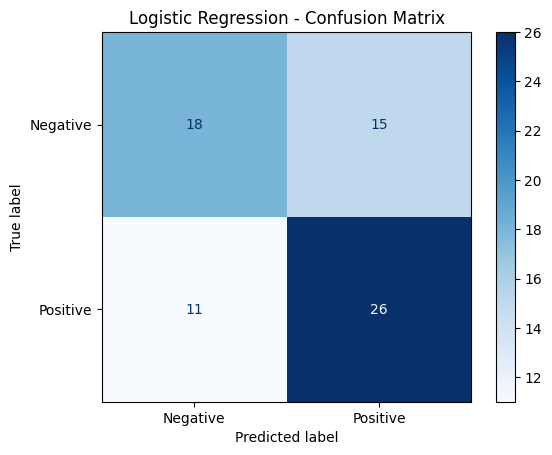

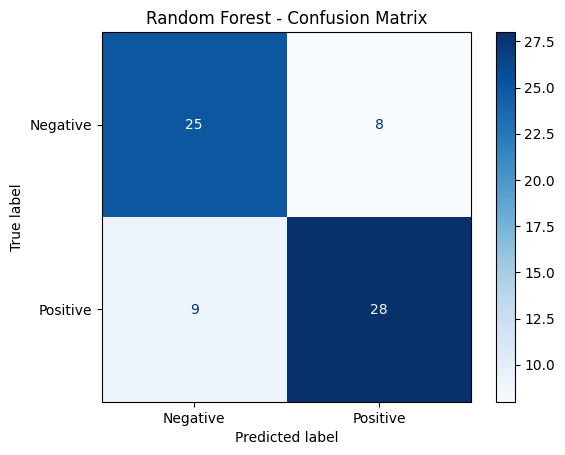

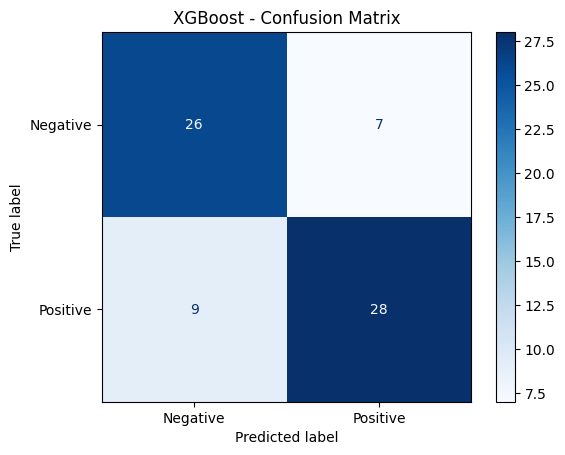

In [28]:
#Confusion Matrices
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

# Use it for all models
plot_confusion_matrix(logreg, X_test, y_test, "Logistic Regression")
plot_confusion_matrix(rf, X_test, y_test, "Random Forest")
plot_confusion_matrix(xgb, X_test, y_test, "XGBoost")


In [29]:
# Save and Load Models (for Web Apps/Deployment)
import joblib

# Save the models
joblib.dump(logreg, "logistic_regression_model.pkl")
joblib.dump(rf, "random_forest_model.pkl")
joblib.dump(xgb, "xgboost_model.pkl")

# Save scaler if used (e.g., StandardScaler)
# joblib.dump(scaler, "scaler.pkl")

print("✅ Models saved!")

# Load later:
# loaded_rf = joblib.load("random_forest_model.pkl")


✅ Models saved!


<Figure size 640x480 with 0 Axes>

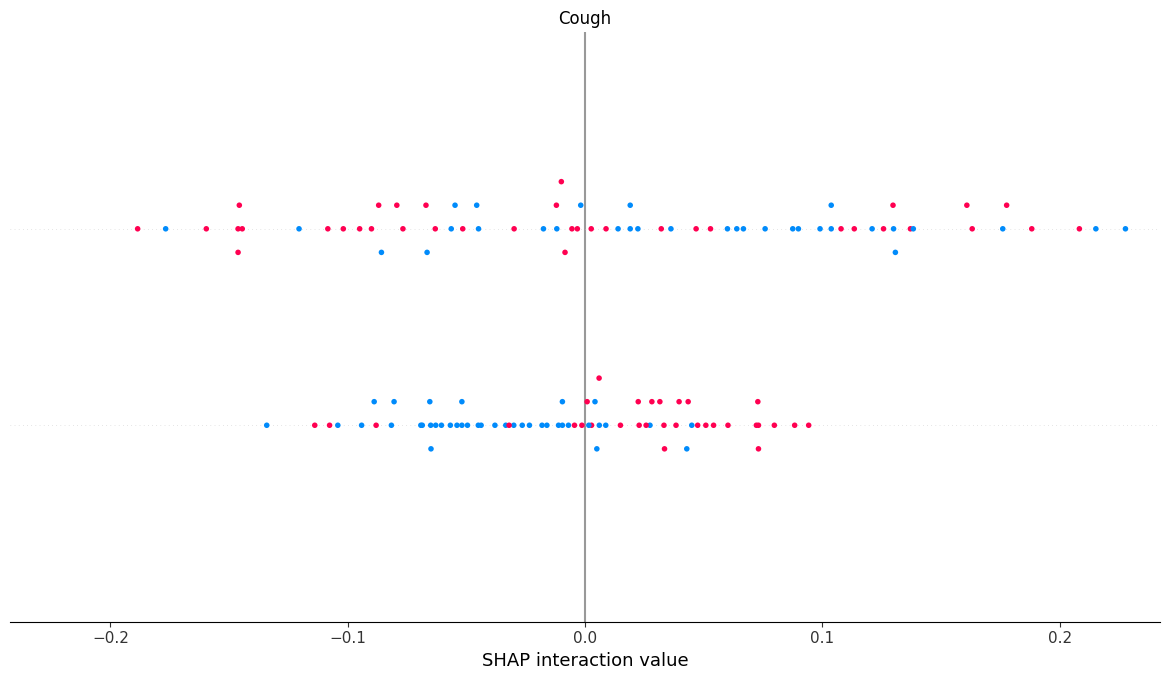

In [39]:
import shap

# Assuming rf is your RandomForestClassifier and X_test is your test data
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Check if shap_values is a list (multi-class output) - In your case, it is.
if isinstance(shap_values, list):
    # Choose the shap_values for the desired class (e.g., class 1 - Positive)
    shap_values_class1 = shap_values[1]
    # Plot for the specific class
    shap.summary_plot(shap_values_class1, X_test, plot_type="bar", show=True)
else:
    # This part won't execute in your case, as it's multi-class
    shap.summary_plot(shap_values, X_test, plot_type="bar", show=True)

# SHAP force plot for 1 patient (adapted for multi-class)
shap.initjs()
